# Characteristic Radii vs $\beta$

In this notebook we will make graphs for $R_c$, $R_{90}$ and $\theta_c$ vs $\beta$ for different values of $\xi$
with  fixed inclination $(i=0)$

Equations for the characteristic radii:
\begin{align}
B &= \frac{\sqrt{3\xi}(1+\beta^{1/2})}{(1-\xi\beta)\left(1+\frac{1}{5}\xi\beta\right)^{1/2}} \\
A &= \frac{1}{1-2\gamma} \\
\gamma &= \frac{1}{6} + \frac{\beta^{1/2}}{3}\left[1+\frac{1-\beta^{1/2}}{10}-\frac{3}{40}\frac{k}{1+\beta^{1/2}}\right] \\
k &= \frac{2}{\xi}-2 \\
\tan\theta_c &= \pm\left|B^2-2A\right|^{1/2}
\end{align}

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
def A(b, xi):
    """
    Returns the radius of curvature normalized with R0

    Corrected version that also depends on anisotropy index k

    xi = 2/(k+2) => k = 2 (1/xi - 1)
    """
    k = 2*(1./xi - 1.)
    sb = np.sqrt(b)
    alpha = (1 + 2*sb*(1 + 0.1*(1 - sb) - (3./40.)*k/(1  +sb)))/6.
    return 1./(1.0-2*alpha)

In [4]:
def theta_c(beta,xi=1.0):
    """
    theta_c defines the excentricity of a given conic
    """
    Acurv = A(beta,xi)
    arg = 2*Acurv - 3*xi*(1.0 + np.sqrt(beta))**2/(1.0 - xi*beta)**2/(1 + 0.2*xi*beta)
    return np.sign(arg)*np.arctan(np.sqrt(np.abs(arg)))

In [5]:
def B(beta,xi=1.0):
    """
    Returns R_90 normalized with R_0
    """
    numerator = np.sqrt(3*xi)*(1+np.sqrt(beta))
    denominator = (1.-xi*beta)*np.sqrt(1.+0.2*xi*beta)
    return numerator/denominator

## Defining arrays for $\beta$ and $\xi$

In [28]:
beta = np.logspace(-3,-1,500)
xi = [0.02, 0.05, 0.1,0.2,0.4,0.8,1.0]
xcolors = sns.color_palette("gnuplot",len(xi))

### start plotting

### Show both radii on the same graph

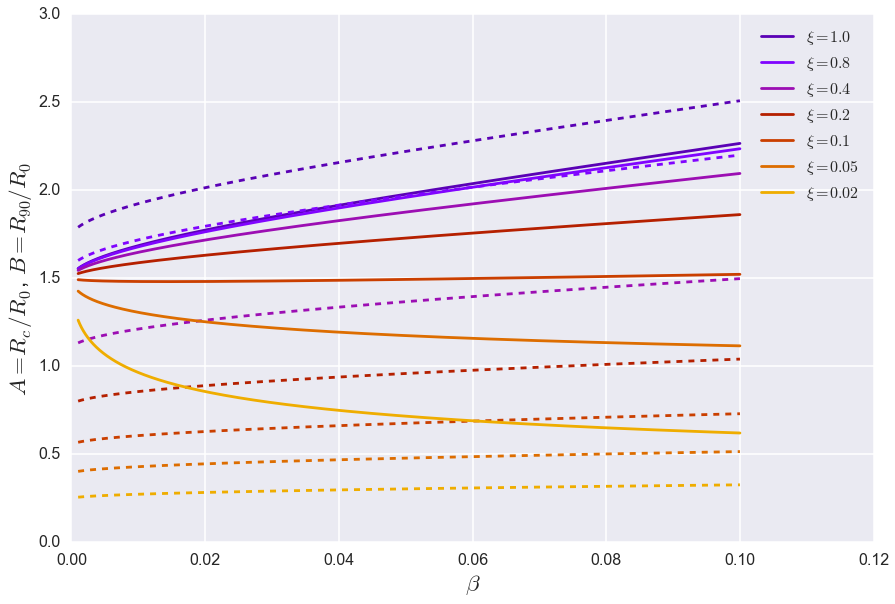

In [29]:
sns.set_context('poster')
for x,xc in zip(reversed(xi), xcolors):
    ACurv = A(beta,x)
    plt.plot(beta,ACurv,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
    Bnorm = B(beta,x)
    plt.plot(beta,Bnorm,linestyle = "--",color=xc,label=None)    
plt.legend()
plt.xlabel(r"$\beta$",fontsize="large")
plt.ylabel(r"$A=R_c/R_0$, $B=R_{90}/R_0$",fontsize="large")
plt.ylim(0.0, None)
plt.tight_layout()
plt.savefig("AB-beta.pdf");

#### $A$ vs $\beta$

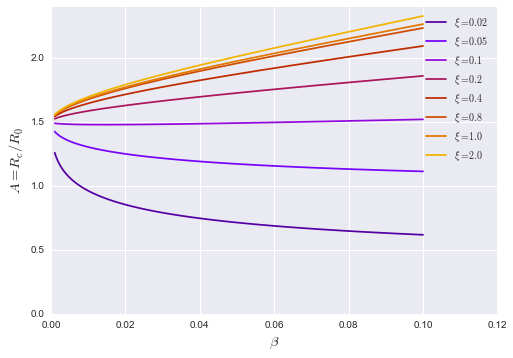

In [18]:
for x,xc in zip(xi,xcolors):
    ACurv = A(beta,x)
    plt.plot(beta,ACurv,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
plt.legend()
plt.xlabel(r"$\beta$",fontsize="large")
plt.ylabel(r"$A=R_c/R_0$",fontsize="large")
plt.ylim(0.0, None)
plt.savefig("A-beta.pdf");

#### $B$ vs $\beta$

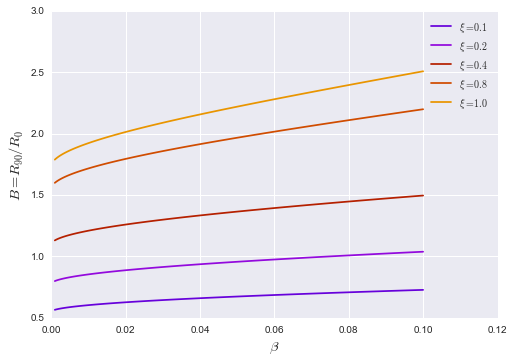

In [15]:
for x,xc in zip(xi,xcolors):
    Bnorm = B(beta,x)
    plt.plot(beta,Bnorm,linestyle = "-",color=xc,label=r"$\xi={}$".format(x))
plt.legend()
plt.xlabel(r"$\beta$",fontsize="large")
plt.ylabel(r"$B=R_{90}/R_0$",fontsize="large")
plt.savefig("B-beta.pdf");

#### $\theta_c$ vs $\beta$

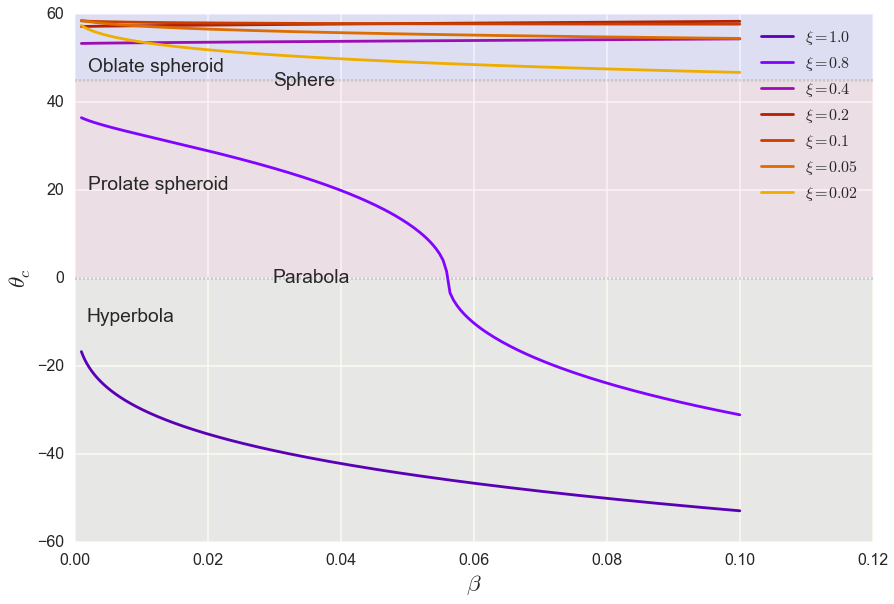

In [40]:
sns.set_context('poster')
plt.fill_between([0.0, 0.12], [-60, -60], [0, 0], color='y', alpha=0.05)
plt.fill_between([0.0, 0.12], [0, 0], [45, 45], color='r', alpha=0.05)
plt.fill_between([0.0, 0.12], [45, 45], [60, 60], color='b', alpha=0.05)
plt.text(0.002, 47.0, 'Oblate spheroid')
plt.text(0.002, 20.0, 'Prolate spheroid')
plt.text(0.002, -10.0, 'Hyperbola')
plt.plot([0.0, 0.12], [0.0, 0.0], ':', alpha=0.5)
plt.plot([0.0, 0.12], [45.0, 45.0], ':', alpha=0.5)
plt.text(0.03, 45.0, 'Sphere', va='center')
plt.text(0.03, 0.0, 'Parabola', va='center')
for x,xc in zip(reversed(xi),xcolors):
    thc = np.degrees(theta_c(beta,x))
    plt.plot(beta,thc,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
plt.legend()
plt.xlabel(r"$\beta$",fontsize="large")
plt.ylabel(r"$\theta_c$",fontsize="large")
plt.tight_layout()
plt.savefig("thc-beta.pdf");